# (Ford-GoBike-Analysis)
## by (Abdulrahman Fekri)

## Preliminary Wrangling

>This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

In [2]:
# importing and printing the head of our data
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.shape

(183412, 16)

In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

> this dataset of 2019 Ford-GoBike contains almost 183412 and 16 columns , and it has data about bike rides with it's duration
, location , latitude , longitude ,  bike id and user type which is it a customer or a subscriber.

### What is/are the main feature(s) of interest in your dataset?

> i think the main feature here is the duration of the trip to determine it's relationship with the type of the customer.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> duration_sec, user_type, member_gender and bike_share_for_all_trip

In [5]:
# cleaning data
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [6]:
#checking null value and drop it 
df.isnull().sum()
df.dropna(inplace=True)

In [7]:
# checking the new shape
df.shape

(174952, 16)

In [8]:
# checking data types of each column
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

### fixing data types
- start_time and end_time  should be dates
- start_station_id shuld ,  end_station_id and bike_id be string or object
- member_birth_year should be date but we will convert it to integer to be easy to use.

In [9]:
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df.start_station_id = df.start_station_id.astype(str)
df.end_station_id = df.end_station_id.astype(str)
df.bike_id = df.bike_id.astype(str)
df.member_birth_year = df.member_birth_year.astype(int)

In [10]:
#checking new data types
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
member_birth_year                   int32
member_gender                      object
bike_share_for_all_trip            object
dtype: object

In [11]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No


In [12]:
#we can get month , day and hour from start_time

df['start_month'] = df.start_time.dt.strftime('%b')
df['start_day'] = df.start_time.dt.strftime('%a')
df['start_hour'] = df.start_time.dt.strftime('%H')
df['start_hour'] = df['start_hour'].astype(int)

In [13]:
# then we can get duration in minute and in hours from duration_sec
df['duration_min']=df['duration_sec']/60
df['duration_min']=df['duration_min'].astype(float)
df['duration_hr']=df['duration_min']/60
df['duration_hr']=df['duration_hr'].astype(float)

In [14]:
# we can get the age of each member from member_birth_year
df['age'] = df['member_birth_year'].apply(lambda x:2021 - x)

In [15]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_day,start_hour,duration_min,duration_hr,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984,Male,No,Feb,Thu,17,869.750000,14.495833,37
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972,Male,No,Feb,Thu,12,1030.900000,17.181667,49
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989,Other,No,Feb,Thu,17,608.166667,10.136111,32
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974,Male,Yes,Feb,Thu,23,26.416667,0.440278,47
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959,Male,No,Feb,Thu,23,29.883333,0.498056,62


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

####  first we investigate duration in hours ( duration_hr )

In [16]:
df.duration_hr.describe()

count    174952.000000
mean          0.195556
std           0.456168
min           0.016944
25%           0.089722
50%           0.141667
75%           0.219167
max          23.485556
Name: duration_hr, dtype: float64

In [17]:
df.duration_sec.describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

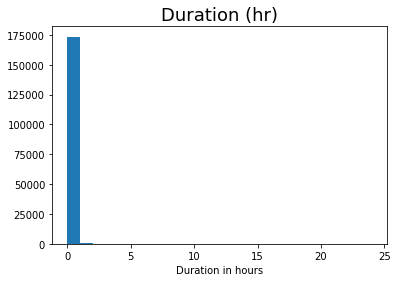

In [18]:
bins = np.arange(0,df['duration_hr'].max()+1, 1)
plt.hist(data=df, x= 'duration_hr', bins=bins)
plt.xlabel("Duration in hours")
plt.title('Duration (hr)', fontsize=18);
plt.show()

- from the above histogram we can see that there is a lot of outliers thats why this graph is not readable

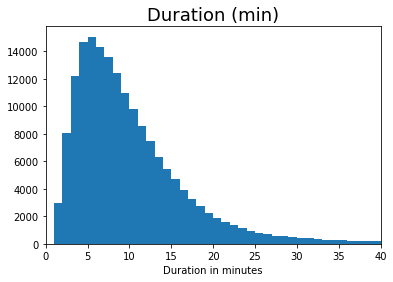

In [19]:
## now we check the histogram of the duration in minutes
bins = np.arange(0,df['duration_min'].max()+1, 1)
plt.hist(data=df, x= 'duration_min', bins=bins)
plt.xlim([0,40])
plt.xlabel("Duration in minutes")
plt.title('Duration (min)', fontsize=18);
plt.show()

- from the above histogram we can tell that average of the time used is about 7 minutes with maximum time of 40 minutes.

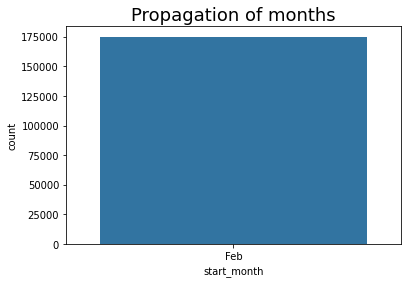

In [20]:
## now we can get the time in month
sb.countplot(data=df,x='start_month');
plt.title('Propagation of months', fontsize=18);

- because our data set is for trips happened in Feb 2019 that is ordinary .

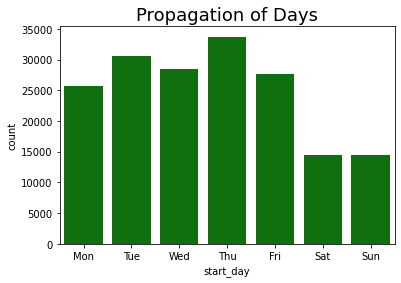

In [21]:
# now lets check the duration in days
order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun']
sb.countplot(data=df, x='start_day', color='green', order=order);
plt.title('Propagation of Days', fontsize=18);

- from the graph above we can see that most of the rides are made in thuresdays

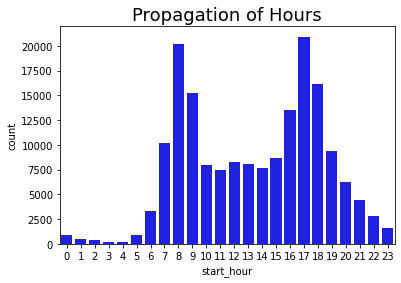

In [22]:
# now we can check the duration in hours
sb.countplot(data=df, x='start_hour', color='blue');
plt.title('Propagation of Hours', fontsize=18);

- from the above graph we can see that most of the rides are made at 5 pm of the days

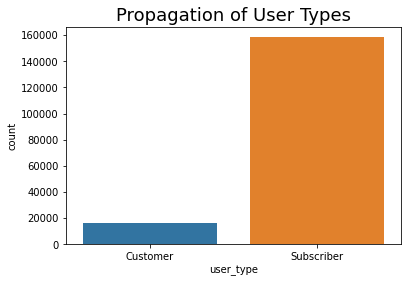

In [23]:
# now we can check which user type are more frquent
sb.countplot(data=df, x='user_type');
plt.title('Propagation of User Types', fontsize=18);

- from the above graph we can easily see that subscribers are more frequent than customers

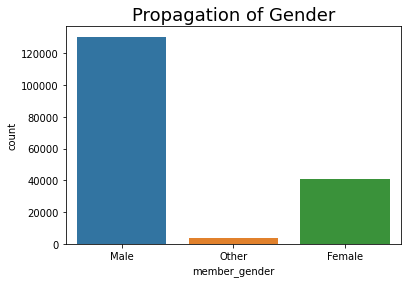

In [24]:
# now lets check the gender
sb.countplot(data=df, x='member_gender');
plt.title('Propagation of Gender', fontsize=18);

- the above graph shows that males are more frequent users than females 

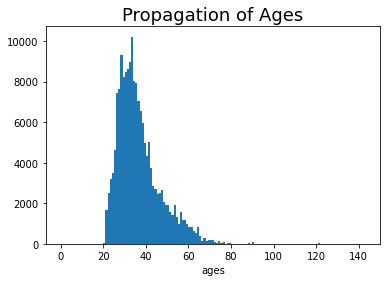

In [25]:
# now lets check the propagation of the ages
bins = np.arange(0,df['age'].max()+1, 1)
plt.hist(data=df, x= 'age', bins=bins)
plt.xlabel("ages")
plt.title('Propagation of Ages', fontsize=18);
plt.show()

- from the above histogram we can see that the average member riders is about 37 years old with min of 20 and max of 80 years old 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> in the above section i investigated the distribution of a lot of variables like the duration in hours and in minutes , the date in months, days and hours and lastly the user type and the member gender and ages.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> of course i had to change all variables data types first to be able to perform on it correctlly, then i had to get month, day and hour from start date and also i had to get duration in minutes and hours from duration in seconds and lastly the age from member birth year

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

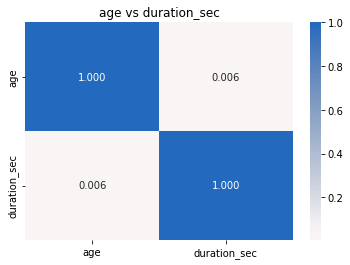

In [26]:
# first we get the relation between numeric variables like age and duration in seconds
numeric_vars = ['age', 'duration_sec']
sb.heatmap(df[numeric_vars].corr(), annot=True, fmt='.3f', cmap = 'vlag_r', center = 0)
plt.title("age vs duration_sec");

- from the above we can see that there is a negative correlation between age and duration in seconds

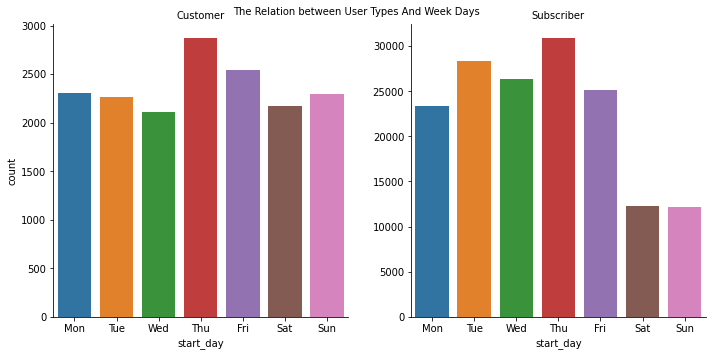

In [27]:
# now lets check the relation between weekdays and usertype
order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun']
g = sb.catplot(data=df, x="start_day", col="user_type", kind='count', sharey=False, order=order)
g.set_titles("{col_name}");
g.fig.suptitle('The Relation between User Types And Week Days', fontsize=10);

- from the above graph we found that the ditribution of count of trips is diffrent from the customers and the subscribers , for example sunday for the subscribers is the least day with trips but it have an average number of trips for the customers also saturday has the same relation and so on .


c:\users\fekri\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


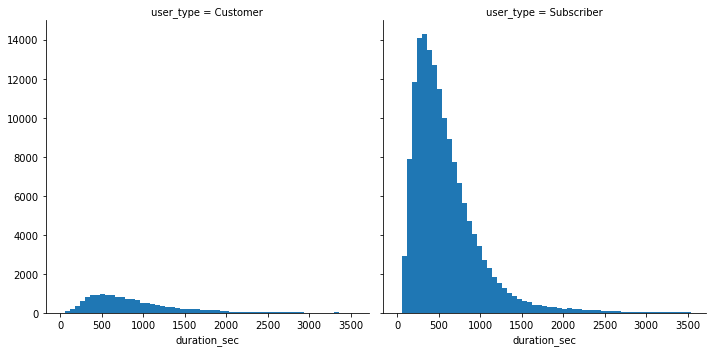

In [28]:
# now we can see the relation between duration in seconds and user types
g = sb.FacetGrid(df, col="user_type", margin_titles=True, size=5)
bins = np.arange(0, 3600,60)
g.map(plt.hist, "duration_sec", bins=bins)
g.set_titles("{col_name}");

- from the above histogram we can see that subscribers by far have more duration than customers , but that could also because the number of subscribers is more than the number of customers

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> in the distribution of the days , i found that subscribers have different days of the trips than the customers . for example subscribers use the rides mostly at middle of the week but less in saturdays and sundays while customers use it on saturday and sundays more


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

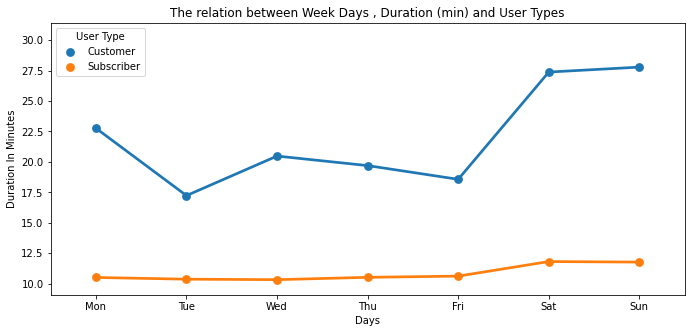

In [29]:
# first lets see the relation between start_day , duration_min and user_type
plt.figure(figsize=[25, 5])
order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun']
plt.subplot(1, 2, 1)
sb.pointplot(data=df, x='start_day', y='duration_min', hue='user_type', errwidth=0, order=order)
plt.xlabel('Days')
plt.ylabel('Duration In Minutes')
plt.title('The relation between Week Days , Duration (min) and User Types')
plt.legend(title='User Type');

- from the above we can see what we mentioned earlier that cutomers have more duration spend on saturdays and sundays than subscribers

In [30]:
df_sub = df.query("user_type=='Subscriber'")
df_cust = df.query("user_type=='Customer'")

# we can make a function to plot the distribution of gender each week day for both subscribers and customers 

def count_func(source):
    sb.countplot(data=source, y='start_day', hue='member_gender');
    

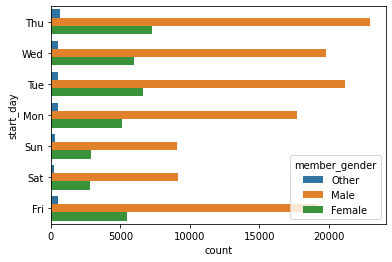

In [31]:
# plot for subscribers 
count_func(df_sub)

- from the above the number of males is average every day except for saturday and sunday 

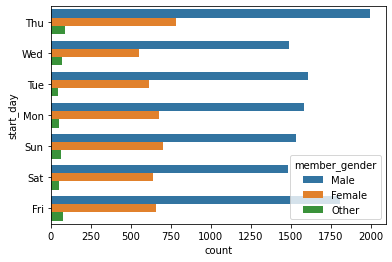

In [32]:
# plot for subscribers 
count_func(df_cust)

- from the above the number of males is average almost every day 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> we observed the same assumbtion as before when we grouped the user type , days and duration . as the customers have different style and duration times than the subscribers.

### Were there any interesting or surprising interactions between features?

> being able to seperate the types of the customers were able to make a complete view about the relation between the type and other variables.

In [33]:
# in the end i will save the data frame as df2 to be used in slide_check
df.to_csv('df2.csv')